# Logistic regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous
(binary). Like all regression analyses, the logistic regression is a predictive analysis.
Logistic regression is used to describe data and to explain the relationship between one dependent binary 
variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Logistic Regression is used when the dependent variable (target) is categorical.

For example:
- To predict whether an email is spam (1) or (0).
- Whether online transaction is fraudulent (1) or not (0).
- Whether the tumor is malignant (1) or not (0).

## Plan of the work

### 1. Data analysis
- Importing Libraries
- Data description
- Shape of data
- Checking Data-Types of columns
- Data correlation

### 2. Data Preprocessing and visualisation
- Treating Null values
- Creating feature name list for ease in futhure coding
- Insightful count plot
- Insightful Count Plots w.r.t the Dependent Variable
- Histograms
- Histograms w.r.t the Dependent Variable
- Analyzing Features w.r.t Age
- Heatmap
- Boxplot
- Treating Outliers
- Data standartization
- Splitting on test and train

### 3. Applying Logistic Regression
- Building Cost Function for Logistic Regression
- Building Gradient Descent to optimizing parameters Theta
- Training of the model
- Iterating Gradient Descent until it minimizes the Cost Function and optimizes theta
- Ploting cost per iteration to check whether the Cost Function is converging or not
- Predicting Heat Disease
- Evaluating of result
 - Classification metrics
 - Confusion matrix

### Import of data

In [1]:
# Let's import demanded libraries
import numpy as np 
import pandas as pd
import math 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

df = pd.read_csv('./framingham.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Data Description

About dataset :
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. 
Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 
The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. 
This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

Full description:</br>
https://www.who.int/en/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

```
List of columns
sex:             male or female
age:             age of the patient
currentSmoker:   whether or not the patient is a current smoker
cigsPerDay:      the number of cigarettes that the person smoked on average in one day
BPMeds:          whether or not the patient was on blood pressure medication
prevalentStroke: whether or not the patient had previously had a stroke
prevalentHyp:    whether or not the patient was hypertensive
diabetes:        whether or not the patient had diabetes
totChol:         total cholesterol level
sysBP:           systolic blood pressure
diaBP:           diastolic blood pressure
BMI:             Body Mass Index
heartRate:       heart rate
glucose:         glucose level

TARGET COLUMN:
TenYearCHD       10 year risk of coronary heart disease CHD
```

### Shape of data

In [2]:
df.shape

(4238, 16)

###  Checking Data-Types of columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Data correlation

Shows us correlation between features and result (TenYearCHD). If correlation is high (aspire to 100), it means that between feature and result exist relationship.

<AxesSubplot:>

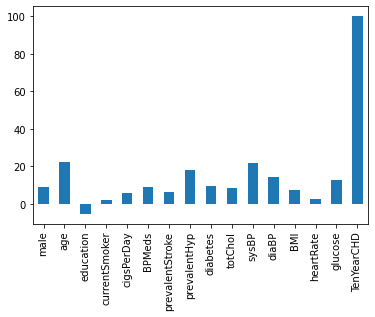

In [4]:
data = pd.DataFrame(df)
data.isnull().sum()/data.shape[0]*100
data.duplicated().sum()
data.corrwith(data['TenYearCHD'])*100
(data.corrwith(data['TenYearCHD'])*100).plot(kind='bar')

## 2. Data preprocessing and visualisation

### Treating Null values

In [5]:
df['cigsPerDay'][df['cigsPerDay'].isnull() == True ] = round(np.mean(df['cigsPerDay']) , 0)
df['BPMeds'][df['BPMeds'].isnull() == True] = 1 
df['totChol'][df['totChol'].isnull() == True ] = np.mean(df['totChol'])
df['BMI'][df['BMI'].isnull() == True ] = np.mean(df['BMI'])
df['heartRate'][df['heartRate'].isnull() == True ] = np.mean(df['heartRate'])
df['glucose'][df['glucose'].isnull() == True ] = np.mean(df['glucose'])
df['education'][df['education'].isnull() == True ] = round(np.mean(df['education']) , 0)

In [6]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,9.003067,0.041765,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.879230,0.200075,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Creating feature name list for ease in futhure coding

In [8]:
contFeat = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose']
discreteFeat = ['male' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes']
discreteFeat_withy = ['male' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes' , 'TenYearCHD']

### Data visualization

On displayed plots we can see distribution of desease 0/1 between features. 
For example we can see that age is more correlated to heart deseases that sigs per day. Or different hypothesis is that after some age - 40 it is a risk of a heart desease for any smoker. And also we can see that for each feature we can approve this thesis. That after 50 people have a big risk of heart desease.
In a second row we can make a hypothesis that smoking doesn't inflict on a risk of a heart desease.

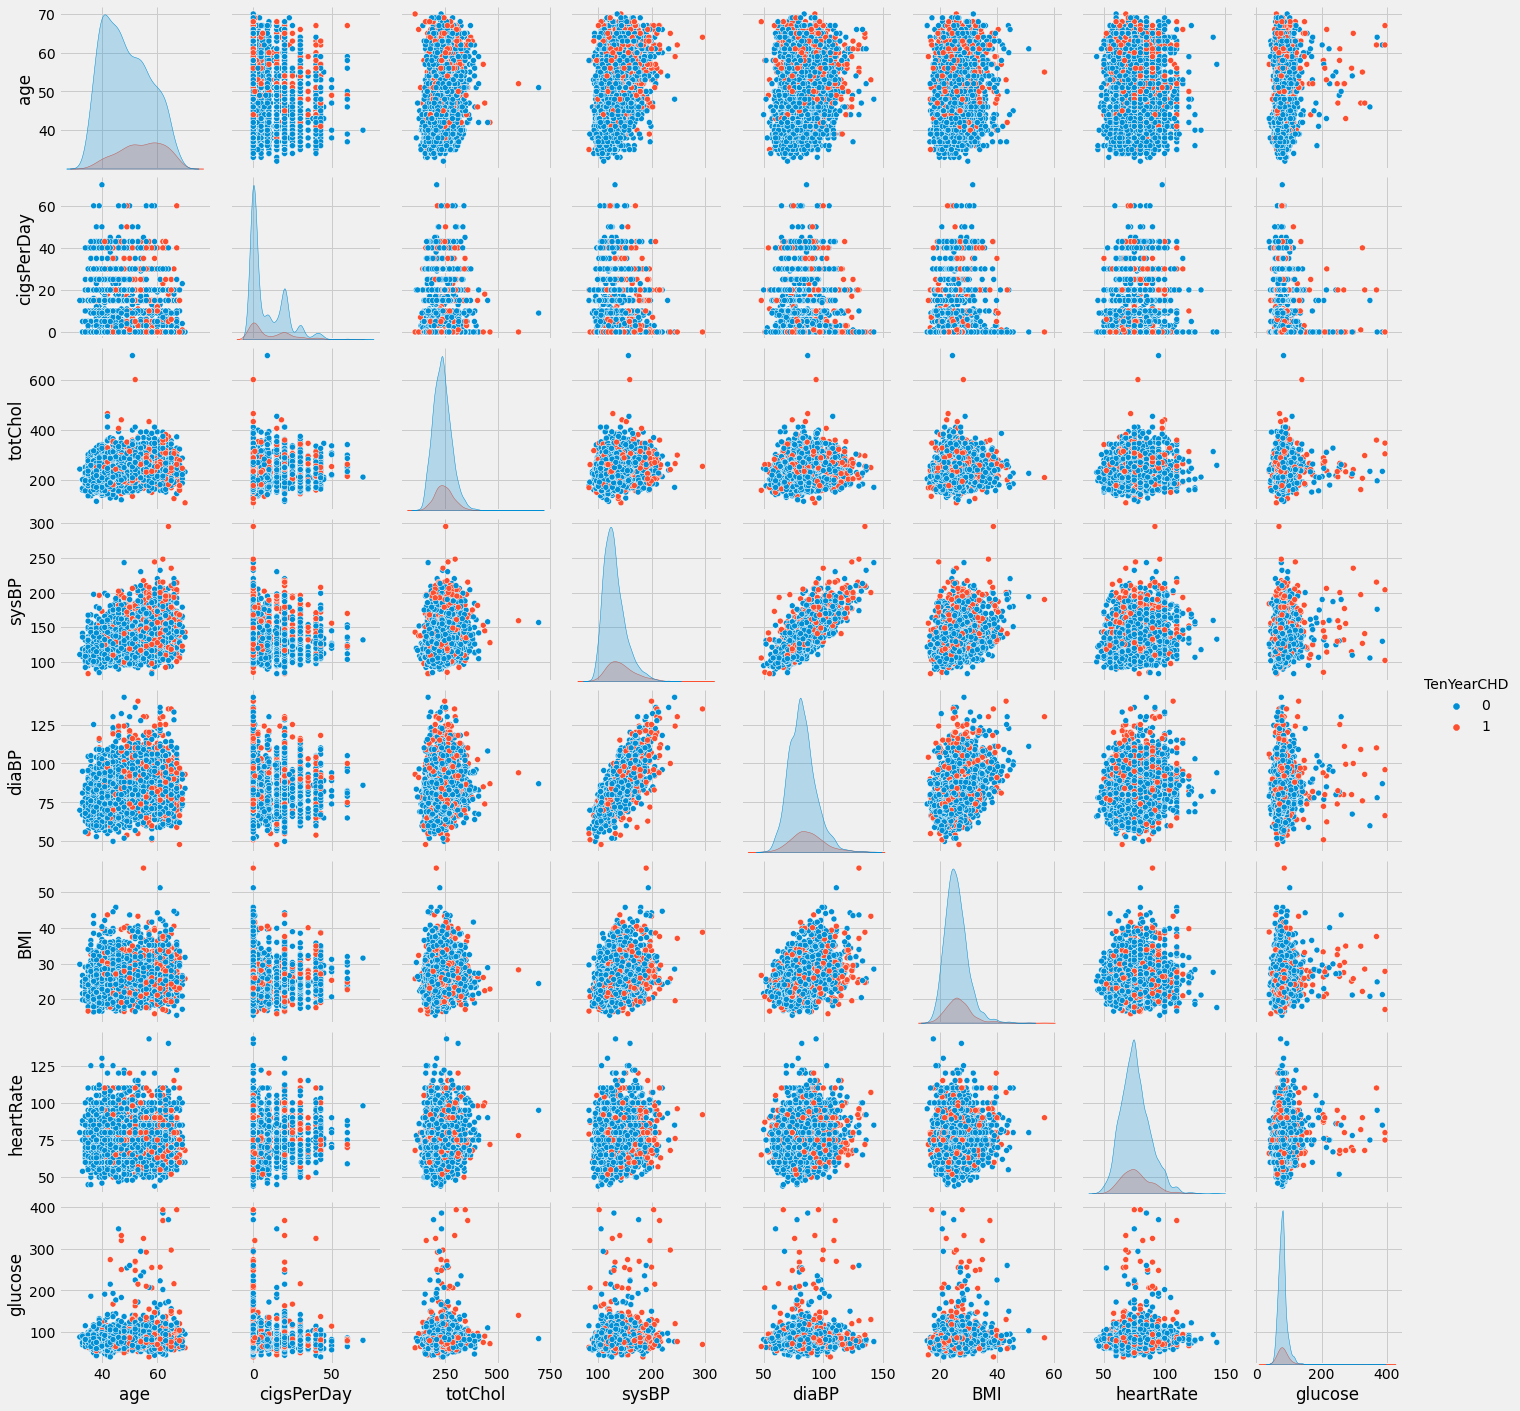

In [9]:
plt.style.use('fivethirtyeight')
sns.pairplot(df , hue = 'TenYearCHD',
             vars = contFeat)
#              vars = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose'])
plt.show()

### Insightful count plot

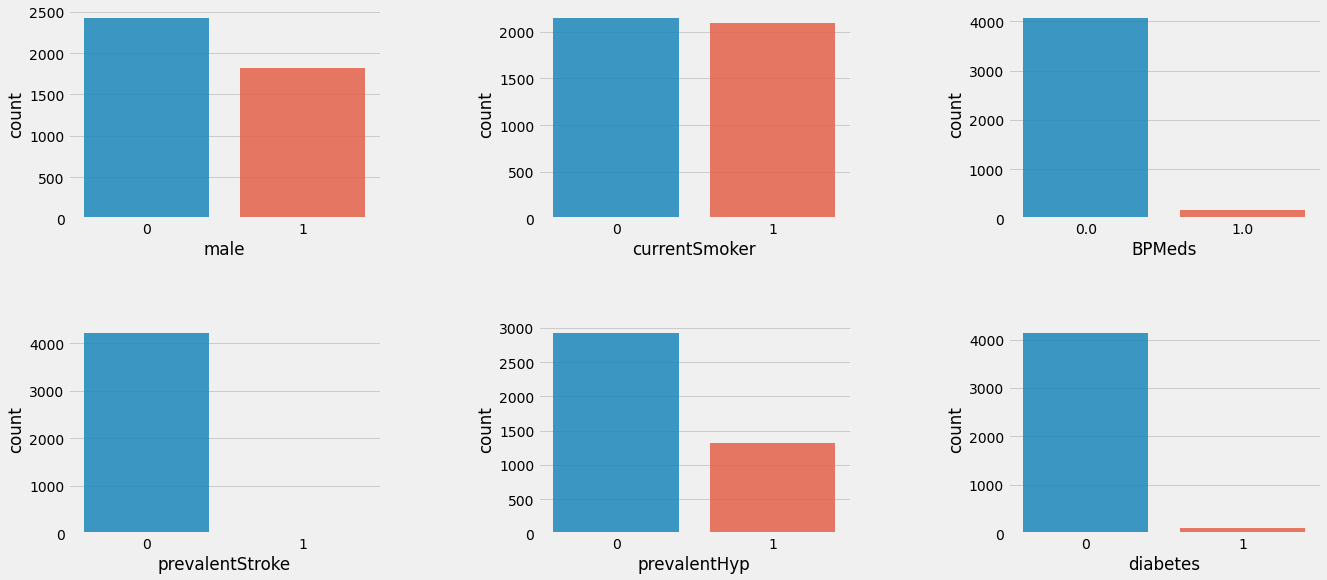

In [10]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , data = df , alpha = 0.85)

plt.show()

### Insightful Count Plots w.r.t the Dependent Variable

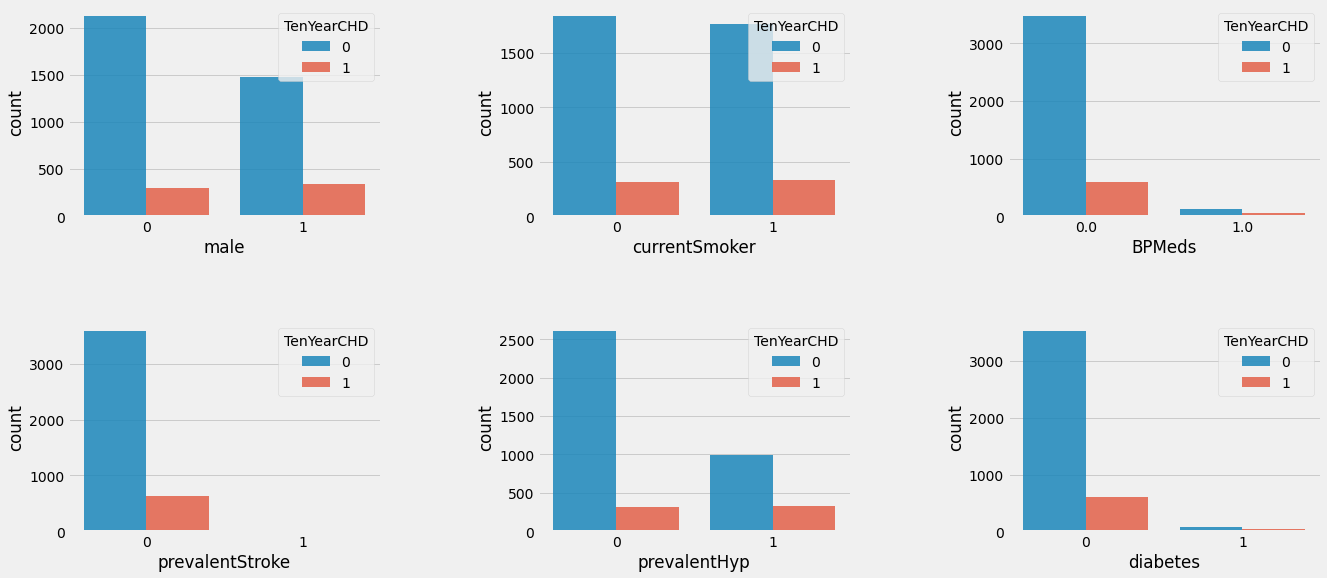

In [11]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , hue = 'TenYearCHD' , data = df , alpha = 0.85)

plt.show()

### Histograms

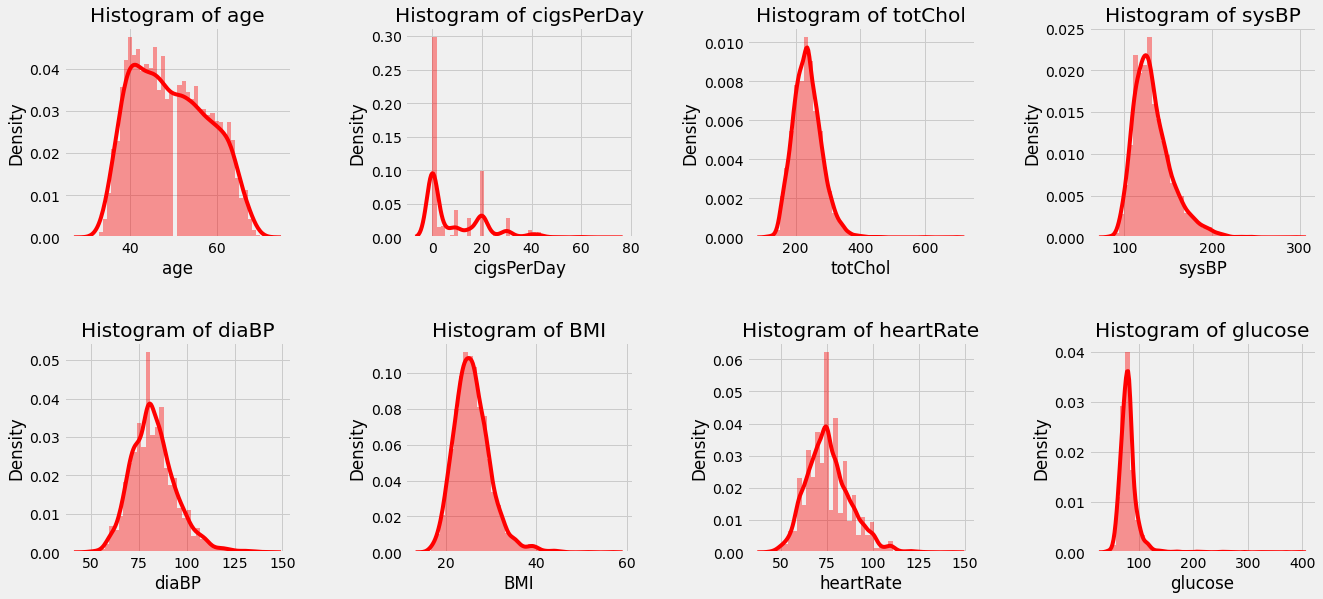

In [12]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in contFeat:
    n += 1
    plt.subplot(2 , 4  , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[f] , bins = 40 , color = 'red')
    plt.title('Histogram of {}'.format(f))

plt.show()

### Histograms w.r.t the Dependent Variable

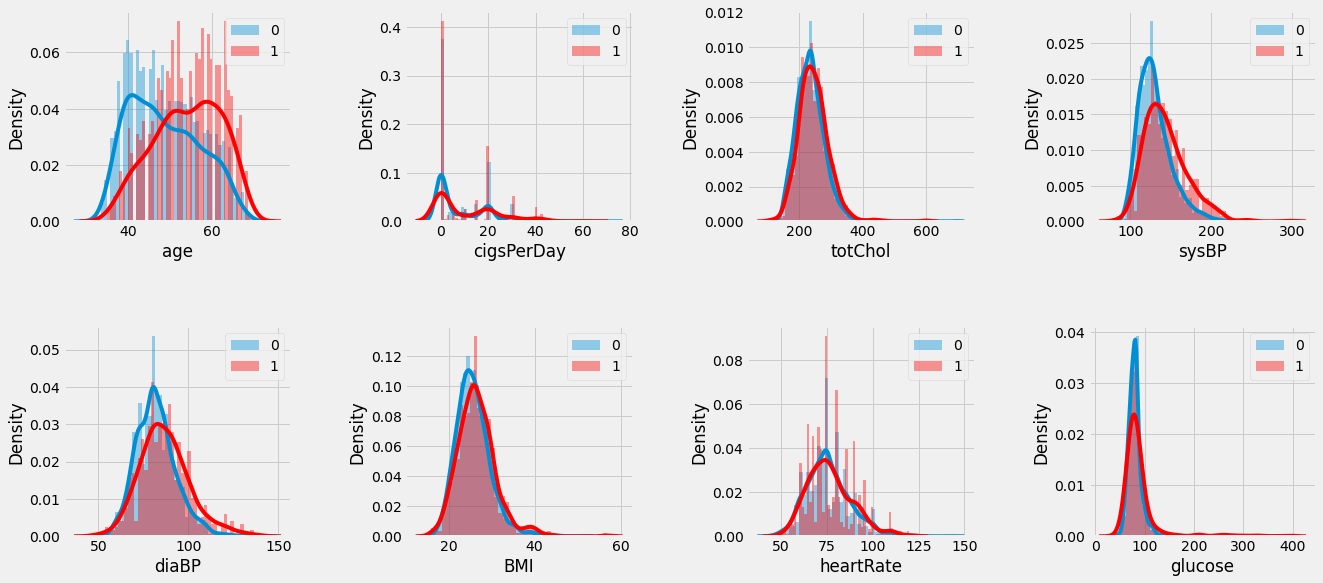

In [13]:
plt.figure(1 , figsize = (20 , 9))
n = 0
for f in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[f][df['TenYearCHD'] == 0] , bins = 50 , label = '0')
    sns.distplot(df[f][df['TenYearCHD'] == 1] , bins = 50 , color = 'red' , label = '1')
    plt.legend()
    
plt.show()

### Analyzing Features w.r.t Age

In [14]:
def scatter_plot(x , y , hue , label1 , label2 , s1 = 50 , s2 = 100):

    plt.scatter(x = x , y = y , s = s1 , data = df[df[hue] == 0] , 
                label = label1 , alpha = 0.8 )

    plt.scatter(x = x , y = y , s = s2 , data = df[df[hue] == 1] , 
                label = label2 , color = 'red' , alpha = 0.5 )

    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

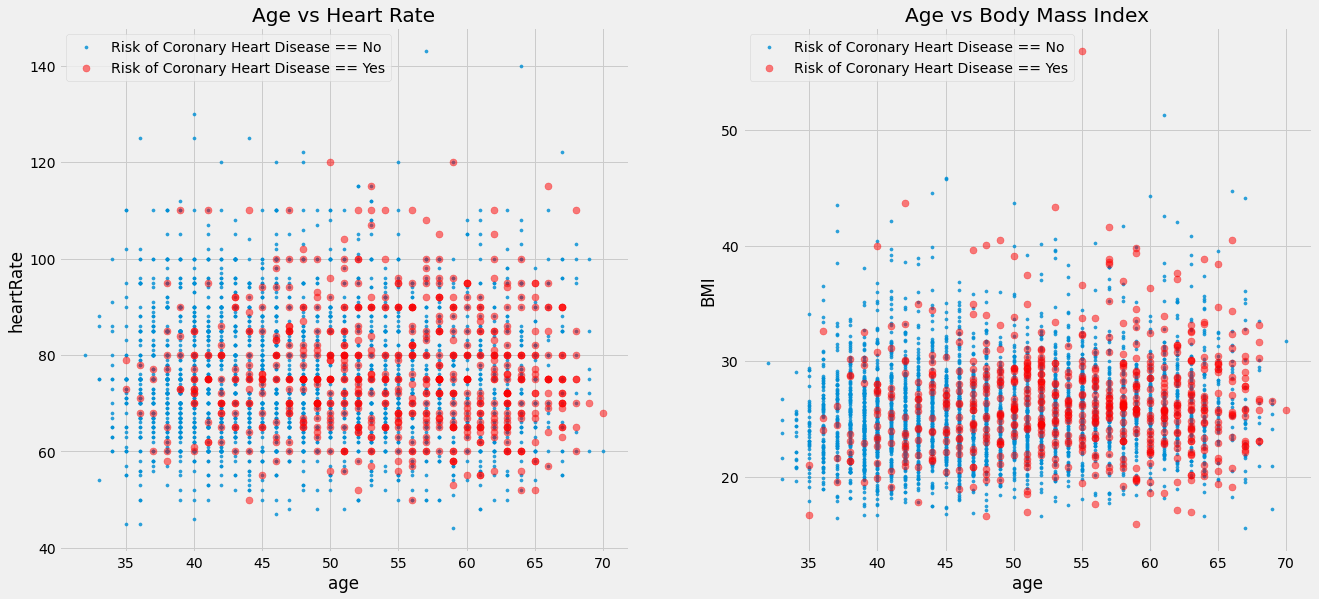

In [15]:
plt.figure(1 , figsize = (20 ,9))

plt.subplot(1 , 2 , 1)
scatter_plot(x = 'age' , y = 'heartRate' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Heart Rate')

plt.subplot(1 , 2 , 2)
scatter_plot(x = 'age' , y = 'BMI' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Body Mass Index')

plt.show()

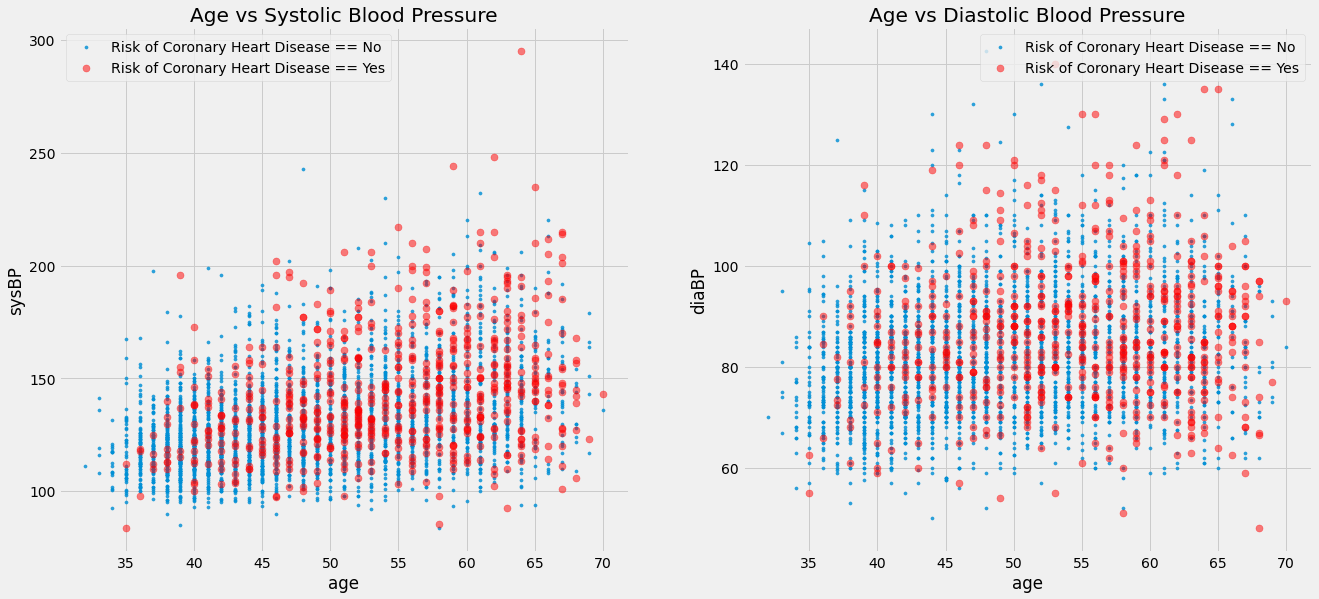

In [16]:
plt.figure(1 , figsize = (20 ,9))

plt.subplot(1 , 2 , 1)
scatter_plot(x = 'age' , y = 'sysBP' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Systolic Blood Pressure')

plt.subplot(1 , 2 , 2)
scatter_plot(x = 'age' , y = 'diaBP' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Diastolic Blood Pressure')


plt.show()

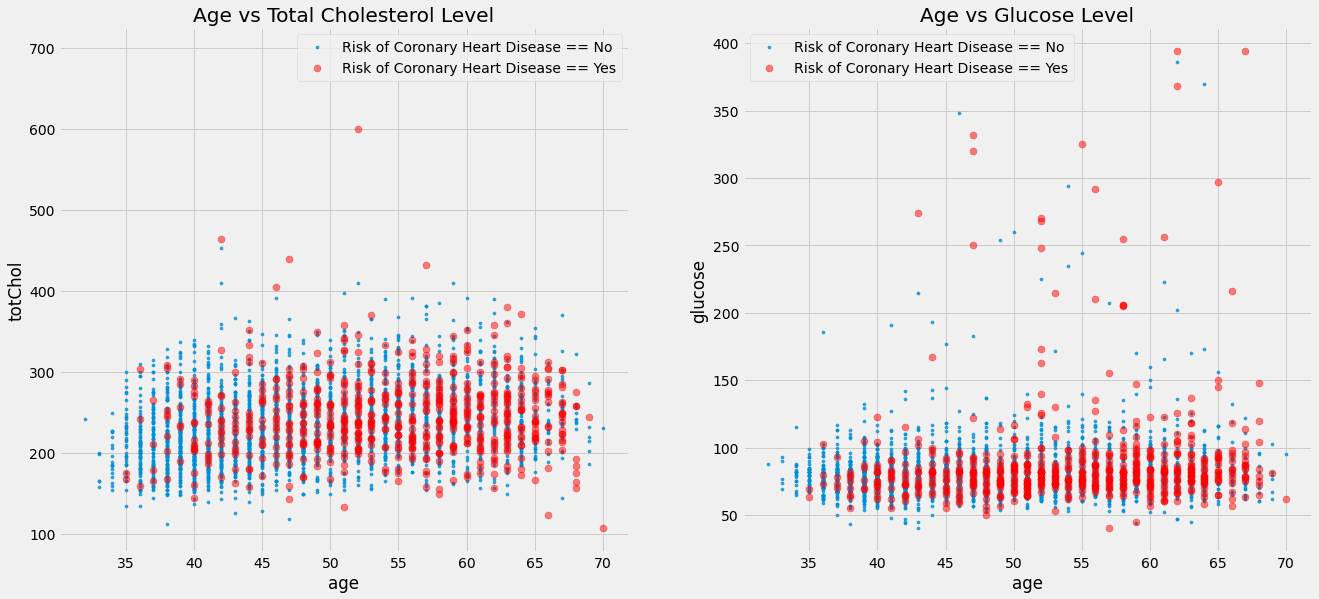

In [17]:
plt.figure(1 , figsize = (20 ,9))

plt.subplot(1 , 2 , 1)
scatter_plot(x = 'age' , y = 'totChol' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Total Cholesterol Level')

plt.subplot(1 , 2 , 2)
scatter_plot(x = 'age' , y = 'glucose' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Glucose Level')


plt.show()

### Heatmap

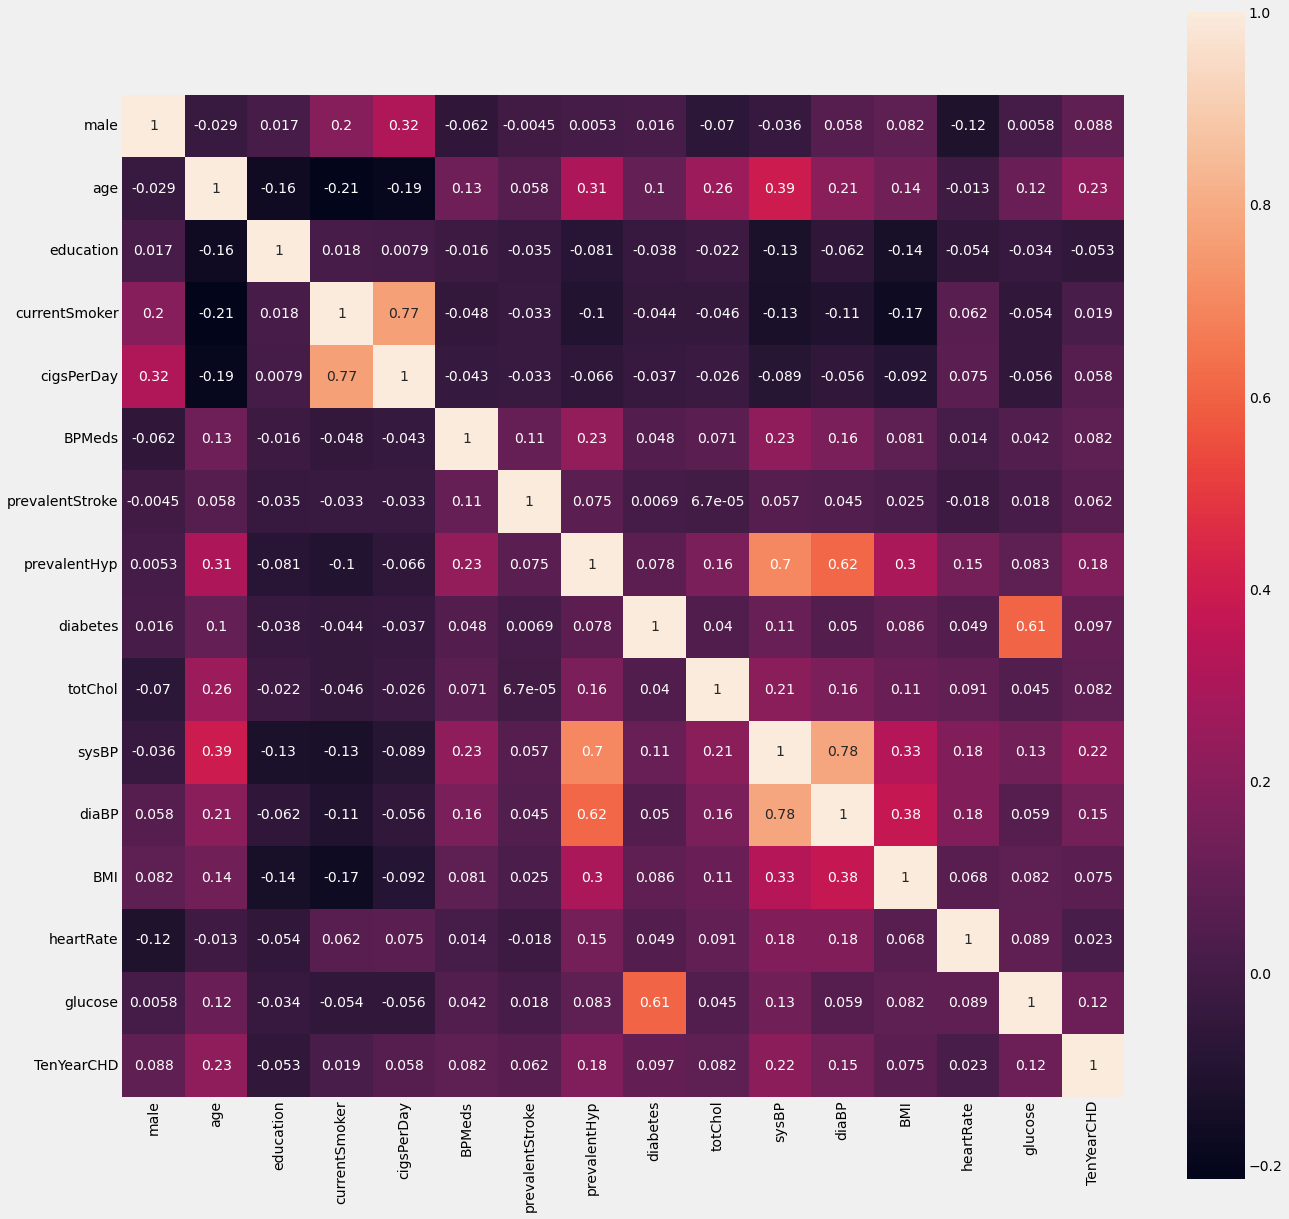

In [18]:
corrmat =  df.corr()

plt.figure(1 ,figsize = (20 , 20))
sns.heatmap(corrmat, annot = True , square  = True)
plt.show()

Systolic Blood Pressuer and Diastolic Blood Pressure are highly correlated to eachother

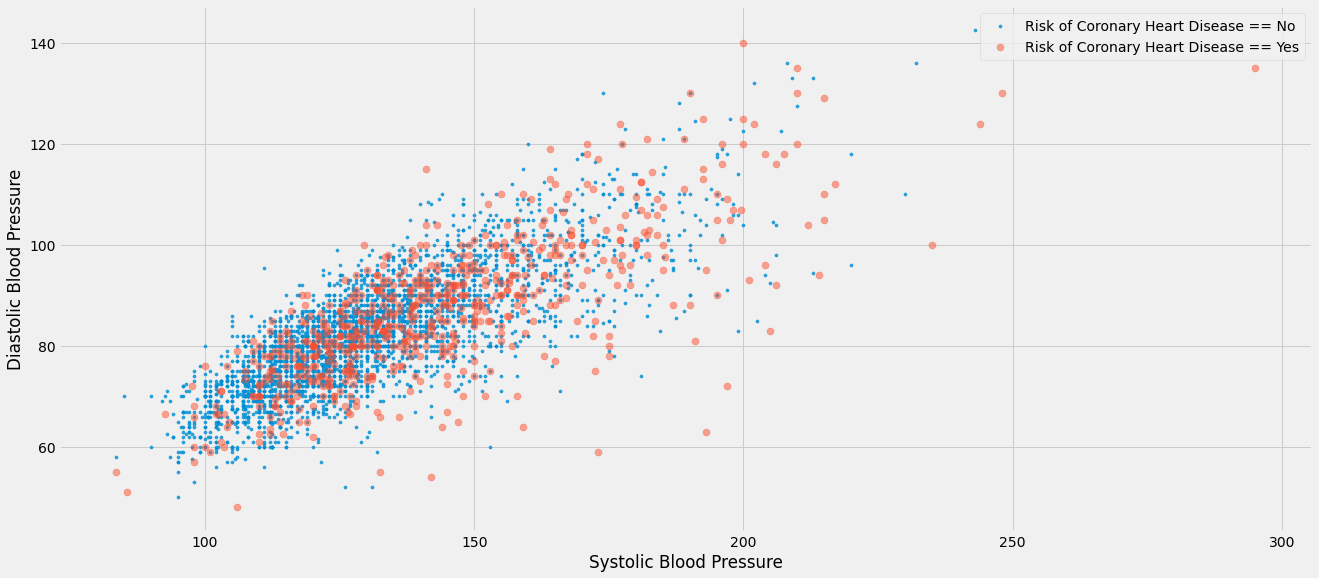

In [19]:
plt.figure(1 , figsize = (20 , 9))

plt.scatter(x = 'sysBP' , y = 'diaBP' , s = 10 , data = df[df['TenYearCHD'] == 0] , 
            label = 'Risk of Coronary Heart Disease == No' , alpha = 0.8 )
plt.scatter(x = 'sysBP' , y = 'diaBP' , s = 50 , data = df[df['TenYearCHD'] == 1] , 
            label = 'Risk of Coronary Heart Disease == Yes' , alpha = 0.5 )

plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.legend()

plt.show()

### Boxplot

Display values on boxplots to see outliers.

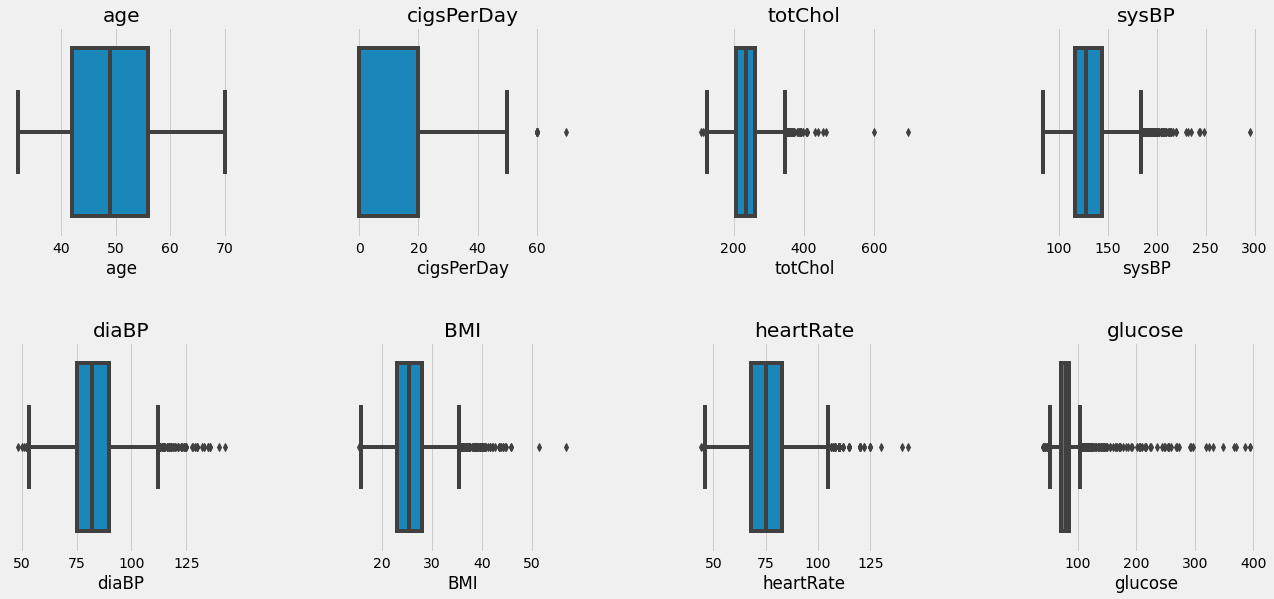

In [20]:
plt.figure(1 , figsize = (20 , 9))

n =  0
for x in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = df[x])
    plt.title('{}'.format(x))
    
plt.show()

### Treating Outliers

There are different approaches such as replacing the outlier with the mean value, or median value or in some cases dropping the observation with the suspected outlier so as to avoid any bias in them. We tend to delete the outlier if they are due to data entry errors caused due to human error, data processing errors.

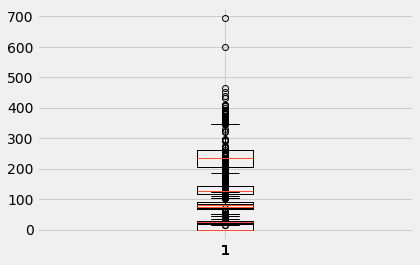

In [21]:
'''treating outliers '''
treating_feature = ['cigsPerDay' , 'totChol' , 'sysBP' , 'diaBP' , 'BMI' , 'heartRate', 'glucose']

'''
upper outliers treatment - replacing with upper whisker
'''
for x in treating_feature:
    b = plt.boxplot(df[x])
    values = [item.get_ydata()[1] for item in b['whiskers']]
    upper_whisker = values[1]
    df[x][df[x] > upper_whisker] = upper_whisker

'''
lower outliers treatment - replacing with lower whisker
'''
treating_feature_lower = [ 'totChol' , 'diaBP' , 'BMI' , 'heartRate', 'glucose']

for x in treating_feature_lower:
    b = plt.boxplot(df[x])
    values = [item.get_ydata()[1] for item in b['whiskers']]
    lower_whisker = values[0]
    df[x][df[x] < lower_whisker] = lower_whisker

### Boxplot after outlier treatment

We can see that we get rid of outlied values.

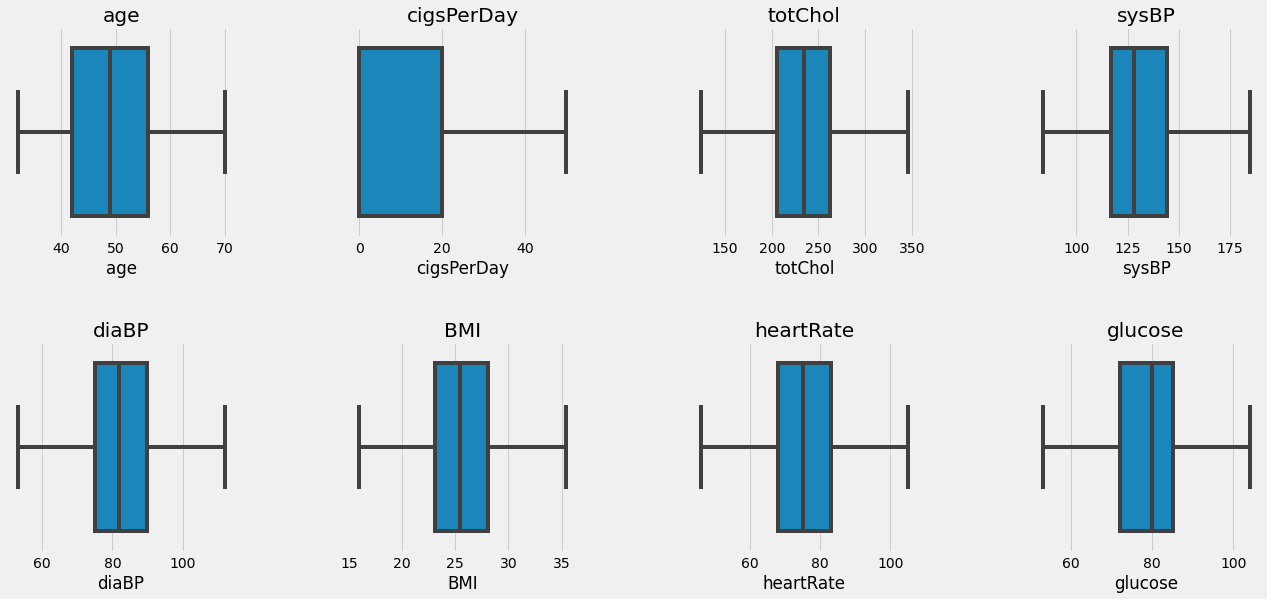

In [22]:
plt.figure(1 , figsize = (20 , 9))

n =  0
for x in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = df[x])
    plt.title('{}'.format(x))
    
plt.show()

### Data standartization

In [23]:
'''Standardizing Data'''
x = df.iloc[: , :15].values

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

### Split to train and test

In [24]:
'''Preparing Data for train and test'''

y = df['TenYearCHD'].values

'''x0 = 1'''
x0 = np.ones([x.shape[0] , 1])

'''concatenating x0 with normalized independent variables'''
x = np.concatenate((x0 , x) , axis = 1 )



'''Train and Test Data'''
from sklearn.model_selection import train_test_split as tt
X_train , X_test , y_train , y_test = tt(x , y , 
                                      test_size = 0.3,
                                      random_state = 20)

## 3. Applying Logistic Regression

- Building Cost Function for Logistic Regression
- Building Gradient Descent to optimizing parameters Theta
- Training of the model
- Iterating Gradient Descent until it minimizes the Cost Function and optimizes theta
- Ploting cost per iteration to check whether the Cost Function is converging or not
- Predicting Heat Disease
- Evaluating of result
 - Accuracy
 - Confusion matrix

In [25]:
def linearFunction(x , theta):
    z =  -(x @ theta.T)
    return z 

'''Logistic Regression'''
def LogisticRegression(x , theta):
    
    z = linearFunction(x , theta)
    e = np.power(math.e , z)
    sigmoidValues = (1 /( 1 + e ))

    return sigmoidValues


'''
the sigmoid function outputs values in form probabilites (values between 0 - 1 )
classifying the probablities to class 0 and 1 
'''

def classify(sigmoidValues):
    
    classified = []
    
    for probability in sigmoidValues:
        
        if probability >= 0.5:
            classified.append(1)
        else:
            classified.append(0)
        
    return classified

### Building Cost Function for Logistic Regression

Cost Function is used to measure error between predicted y and original y.

In [26]:
'''Cost funtion'''
def costFuntion(x , y , theta):
    
    y_pred_prob = LogisticRegression(x , theta)
    
    y = y.reshape([y.shape[0] , 1])
    
    one =  y*np.log(y_pred_prob)
    zero = (1 - y)*np.log(1 - y_pred_prob)
    
    m = len(x)
    costf = one + zero
    costf = (-1/m)*sum(costf)
    
    return costf

### Building Gradient Descent to optimizing parameters Theta

Gradient descent fine tunes the theta parameters and minimizes the Cost Function

In [27]:
'''Gradient Descent'''
def gradientDescent(x , y , theta , alpha , iterations):
    costCaptured = np.zeros(iterations)
    y = y.reshape([y.shape[0] , 1])
    
    for i in range(iterations):
        
        y_pred_prob = LogisticRegression(x , theta)
        
        partialDerivativeoftheta =  (alpha*sum((y_pred_prob - y)*x))/len(x)
        theta = theta - partialDerivativeoftheta
        costCaptured[i] = costFuntion(x , y , theta)
    
    return theta , costCaptured

### Training of the model

In [28]:
'''Initiating Parameters'''

theta = np.zeros([1 , x.shape[1]])
'''alpha is the learning rate'''
alpha = 0.009
iteration = 3000

### Iterating Gradient Descent until it minimizes the Cost Function and optimizes theta

In [29]:
thetaOptimized , costCaptured = gradientDescent(X_train , y_train , theta , alpha , iteration)
print(thetaOptimized)

[[-1.86738771  0.2470023   0.46210816 -0.08221762  0.05170847  0.15486247
   0.04756361  0.08812962  0.15832474  0.13709592  0.06187662  0.24893232
  -0.02414208  0.01470057 -0.00643632  0.03242733]]


### Ploting cost per iteration to check whether the Cost Function is converging or not

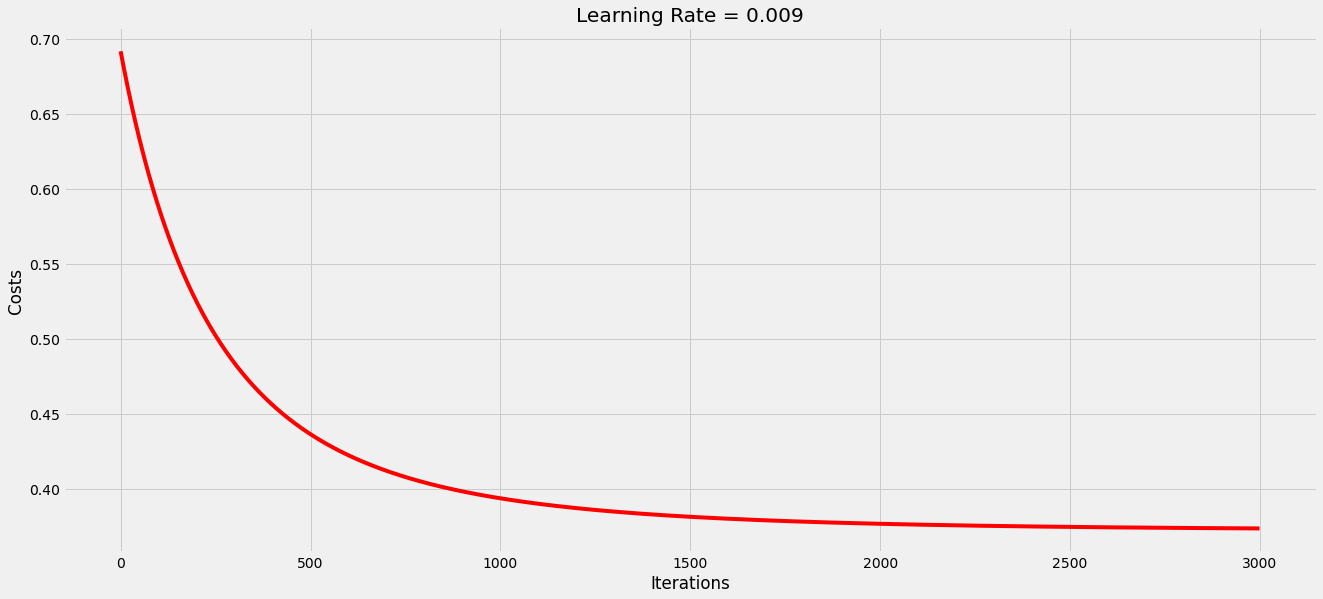

In [30]:
plt.figure(1 , figsize = (20 , 9))
plt.plot(np.arange(iteration) , costCaptured , 'r')
plt.xlabel('Iterations')
plt.ylabel('Costs')
plt.title('Learning Rate = {}'.format(alpha))
plt.show()

### Predicting Heat Disease

In [31]:
y_pred_probabilities = LogisticRegression(X_test, thetaOptimized)
y_pred_classified = classify(y_pred_probabilities)

### Evaluating

### Classification metrics

[About metrics](https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce)

#### Accuracy

Number of correct predictions / Total number of predictions

#### Precision

There are many cases in which classification accuracy is not a good indicator of your model performance. One of these scenarios is when your class distribution is imbalanced (one class is more frequent than others). In this case, even if you predict all samples as the most frequent class you would get a high accuracy rate, which does not make sense at all (because your model is not learning anything, and is just predicting everything as the top class).

Precision= True_Positive/ (True_Positive+ False_Positive)

#### Recall
Recall is another important metric, which is defined as the fraction of samples from a class which are correctly predicted by the model. More formally:

Recall= True_Positive/ (True_Positive+ False_Negative)

#### F1 Score
Depending on application, you may want to give higher priority to recall or precision. But there are many applications in which both recall and precision are important. Therefore, it is natural to think of a way to combine these two into a single metric. One popular metric which combines precision and recall is called F1-score, which is the harmonic mean of precision and recall defined as:

F1-score= 2*Precision*Recall/(Precision+Recall)


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print('\nAccuracy')
print(accuracy_score(y_test , y_pred_classified))
print(print(classification_report(y_test, y_pred_classified)))


Accuracy
0.8466981132075472
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1073
           1       0.60      0.06      0.11       199

    accuracy                           0.85      1272
   macro avg       0.73      0.53      0.51      1272
weighted avg       0.81      0.85      0.79      1272

None


#### Confusion matrix : 
A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class [wiki]. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.

true positive (TP)
A test result that correctly indicates the presence of a condition or characteristic
true negative (TN)
A test result that correctly indicates the absence of a condition or characteristic
false positive (FP)
A test result which wrongly indicates that a particular condition or attribute is present
false negative (FN)
A test result which wrongly indicates that a particular condition or attribute is absent

Confusion Matrix
[[1065    8]
 [ 187   12]]



<AxesSubplot:>

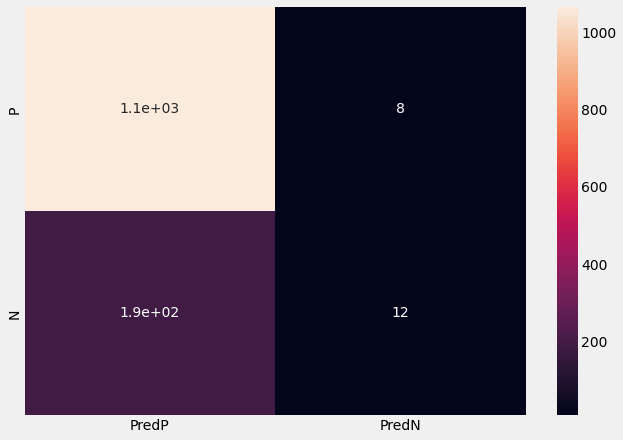

In [33]:
print('Confusion Matrix')
print(confusion_matrix(y_test , y_pred_classified))
print('')

array = confusion_matrix(y_test , y_pred_classified)
df_cm = pd.DataFrame(array, index = [i for i in 'PN'],
                  columns = [i for i in ['PredP','PredN']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='.2g')